<a href="https://colab.research.google.com/github/nadya-az/artificial_neural_networks/blob/main/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%E2%84%963.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Задание №1. Использование глубокой сверточной нейронной сети для классификации предметов одежды на примере датасета Fashion MNIST

In [8]:
from keras.datasets import fashion_mnist # импорт исходного датасета
from keras.models import Sequential


from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D, AveragePooling2D 
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten



 
from keras.optimizers import Adam, SGD
import matplotlib.pyplot as plt
import numpy as np

In [9]:
(trainX, trainy), (testX, testy) = fashion_mnist.load_data()


trainX = trainX / 255
testX = testX / 255
 
trainy = keras.utils.to_categorical(trainy, 10)
testy = keras.utils.to_categorical(testy, 10)

trainX = np.expand_dims(trainX, axis=3)
testX = np.expand_dims(testX, axis=3)

print('Train: X = ', trainX.shape)
print('Test: X = ', testX.shape)

print('Train: Y = ', trainy.shape)
print('Test: Y = ', testy.shape)

Train: X =  (60000, 28, 28, 1)
Test: X =  (10000, 28, 28, 1)
Train: Y =  (60000, 10)
Test: Y =  (10000, 10)


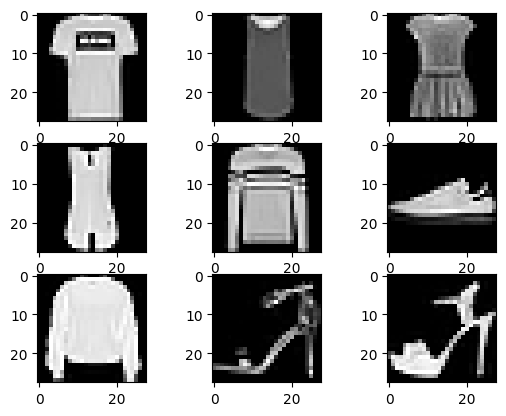

In [10]:
for i in range(1, 10):
    plt.subplot(3, 3, i)
    plt.imshow(trainX[i], cmap=plt.get_cmap('gray'))
 
plt.show()

In [11]:
model = keras.Sequential([
    Conv2D(6, (5,5), strides=(1,1), activation='tanh', input_shape=(28,28,1)),
    AveragePooling2D(pool_size=(2,2), strides=(2,2)),
    Conv2D(16, (5,5), strides=(1,1), activation='tanh'),
    AveragePooling2D(pool_size=(2,2), strides=(2,2)),

    Flatten(),

    Dense(units=120,activation='tanh'),
    Dense(units=84,activation='tanh'),
    Dense(units=10,activation='softmax')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 24, 24, 6)         156       
                                                                 
 average_pooling2d_2 (Averag  (None, 12, 12, 6)        0         
 ePooling2D)                                                     
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 16)          2416      
                                                                 
 average_pooling2d_3 (Averag  (None, 4, 4, 16)         0         
 ePooling2D)                                                     
                                                                 
 flatten_1 (Flatten)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 120)              

In [12]:
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])



In [13]:
EPOCH = 5

In [14]:
h = model.fit(trainX, trainy, batch_size=28, epochs=EPOCH, validation_split=0.2)

Epoch 1/5
1715/1715 [==============================] - 40s 22ms/step - loss: 0.5805 - accuracy: 0.7839 - val_loss: 0.4605 - val_accuracy: 0.8313
Epoch 2/5
1715/1715 [==============================] - 36s 21ms/step - loss: 0.4169 - accuracy: 0.8475 - val_loss: 0.4085 - val_accuracy: 0.8512
Epoch 3/5
1715/1715 [==============================] - 37s 21ms/step - loss: 0.3696 - accuracy: 0.8644 - val_loss: 0.3752 - val_accuracy: 0.8591
Epoch 4/5
1715/1715 [==============================] - 38s 22ms/step - loss: 0.3404 - accuracy: 0.8727 - val_loss: 0.3558 - val_accuracy: 0.8712
Epoch 5/5
1715/1715 [==============================] - 36s 21ms/step - loss: 0.3192 - accuracy: 0.8833 - val_loss: 0.3486 - val_accuracy: 0.8734


In [15]:
model.evaluate(testX, testy)

313/313 [==============================] - 3s 8ms/step - loss: 0.3713 - accuracy: 0.8644


[0.3713033199310303, 0.8644000291824341]

1.6 Анализируем обученную модель. Строим график (графики) обучения

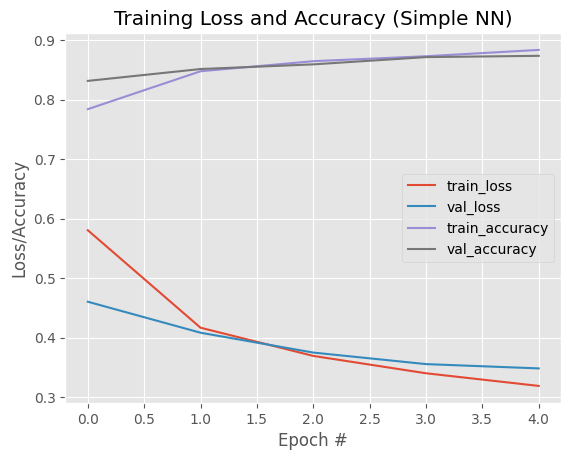

In [16]:
N = np.arange(0, EPOCH)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, h.history["loss"], label="train_loss")
plt.plot(N, h.history["val_loss"], label="val_loss")
plt.plot(N, h.history["accuracy"], label="train_accuracy")
plt.plot(N, h.history["val_accuracy"], label="val_accuracy")
plt.title("Training Loss and Accuracy (Simple NN)")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

1.7. Загружаем свои изображения. С помощью функции predict() получаем предсказание нейронной сети

In [17]:
import cv2
from google.colab.patches import cv2_imshow

# Добавляем интерфейс для загрузки изображений напрямую из блокнота
from google.colab import files
uploaded = files.upload() 

# загружаем входное изображение, меняем его размер на необходимый и выводим его

image = cv2.imread(list(uploaded.keys())[0], cv2.IMREAD_GRAYSCALE) # Преобразование изображения в оттенки серого при считывании
image = cv2.resize(image, (28, 28)) # Изменение разрешения изображения
image = cv2.bitwise_not(image) # Инверсия цветов (если в оригинале цифра написана черным цветом на белом фоне)
orig = image
image = image.reshape(-1, 28, 28, 1) # Приводим изображение из вида (28,28) в вид (1, 28, 28, 1)

cv2_imshow(orig)

Saving Free-shipping-2012-women-bags-handbag-formal-summer-women-s-fashion-totes.jpg to Free-shipping-2012-women-bags-handbag-formal-summer-women-s-fashion-totes.jpg


In [18]:
preds = model.predict(image)

print(preds)

1/1 [==============================] - 0s 144ms/step
[[2.6744408e-05 3.7213460e-05 4.9205817e-04 1.8554793e-04 5.7642478e-03
  1.9448938e-05 7.5418159e-04 2.9398166e-04 9.9236661e-01 6.0009297e-05]]


In [19]:
classes = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

i = preds.argmax(axis=1)[0]
type_clothes = classes[i]
print(f"Загружен тип одежды: {type_clothes}")


Загружен тип одежды: Bag


In [20]:
import cv2
from google.colab.patches import cv2_imshow

# Добавляем интерфейс для загрузки изображений напрямую из блокнота
from google.colab import files
uploaded = files.upload() 

# загружаем входное изображение, меняем его размер на необходимый и выводим его

image = cv2.imread(list(uploaded.keys())[0], cv2.IMREAD_GRAYSCALE) # Преобразование изображения в оттенки серого при считывании
image = cv2.resize(image, (28, 28)) # Изменение разрешения изображения
image = cv2.bitwise_not(image) # Инверсия цветов (если в оригинале цифра написана черным цветом на белом фоне)
orig = image
image = image.reshape(-1, 28, 28, 1) # Приводим изображение из вида (28,28) в вид (1, 28, 28, 1)

cv2_imshow(orig)

Saving 42ac22734c5c86571bf74138959b34ec.jpg to 42ac22734c5c86571bf74138959b34ec.jpg


In [22]:
preds = model.predict(image)
classes = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

i = preds.argmax(axis=1)[0]
type_clothes = classes[i]
print(f"Загружен тип одежды: {type_clothes}", preds)



1/1 [==============================] - 0s 168ms/step
Загружен тип одежды: Trouser [[0.03088165 0.4663407  0.10812222 0.02814525 0.26851982 0.00079601
  0.01833772 0.00074936 0.07706327 0.00104391]]


In [23]:
import cv2
from google.colab.patches import cv2_imshow

# Добавляем интерфейс для загрузки изображений напрямую из блокнота
from google.colab import files
uploaded = files.upload() 

# загружаем входное изображение, меняем его размер на необходимый и выводим его

image = cv2.imread(list(uploaded.keys())[0], cv2.IMREAD_GRAYSCALE) # Преобразование изображения в оттенки серого при считывании
image = cv2.resize(image, (28, 28)) # Изменение разрешения изображения
image = cv2.bitwise_not(image) # Инверсия цветов (если в оригинале цифра написана черным цветом на белом фоне)
orig = image
image = image.reshape(-1, 28, 28, 1) # Приводим изображение из вида (28,28) в вид (1, 28, 28, 1)

cv2_imshow(orig)

Saving tolstovka-zhenskaya-moline.jpg to tolstovka-zhenskaya-moline.jpg


In [24]:
preds = model.predict(image)
classes = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

i = preds.argmax(axis=1)[0]
type_clothes = classes[i]
print(f"Загружен тип одежды: {type_clothes}", preds)


1/1 [==============================] - 0s 373ms/step
Загружен тип одежды: Coat [[3.4388681e-03 1.0643069e-03 1.7738309e-02 3.3592932e-02 9.0551150e-01
  1.0610794e-03 1.2065779e-02 4.4596216e-04 2.5036128e-02 4.5190005e-05]]


Задание №2. Использование глубокой сверточной нейронной сети для классификации изображений по своему датасету

Используя датасет, собранный для предыдущей работы, разработайте и обучите свою модель глубокой сверточной нейронной сети для классификации изображений

In [25]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import random
import pickle
import cv2
from google.colab.patches import cv2_imshow
import os

from keras.models import Sequential


from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D, AveragePooling2D 
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten



 
from keras.optimizers import Adam, SGD
import matplotlib.pyplot as plt
import numpy as np

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [26]:
print("[INFO] loading images...")
data = []
labels = []

[INFO] loading images...


In [27]:
imagePaths = sorted(list(paths.list_images("/content/drive/MyDrive/flower_photos")))

random.shuffle(imagePaths)

In [28]:
for imagePath in imagePaths:
	
	image = cv2.imread(imagePath) # загружаем изображение
	image = cv2.resize(image, (32, 32)) # меняем его разрешение на 32x32 пикселей (без учета соотношения сторон),
																								# сглаживаем его в 32x32x3=3072 пикселей
	data.append(image) # добавляем в список

	label = imagePath.split(os.path.sep)[-2] 	# извлекаем метку класса из пути к изображению (метка класса зависит от имени папки)
	labels.append(label) # 

In [29]:
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)

In [30]:
(trainX, testX, trainY, testY)= train_test_split(data, labels, test_size=0.25, random_state=42)

trainX = trainX / 255
testX = testX / 255
 

# trainX = np.expand_dims(trainX, axis=3)
# testX = np.expand_dims(testX, axis=3)

print('Train: X = ', trainX.shape)
print('Test: X = ', testX.shape)

Train: X =  (2272, 32, 32, 3)
Test: X =  (758, 32, 32, 3)


In [31]:
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)

print('Train: Y = ', trainY.shape)
print('Test: Y = ', testY.shape)

Train: Y =  (2272, 5)
Test: Y =  (758, 5)


In [32]:
model_old = keras.Sequential([
    Conv2D(6, (5,5), strides=(1,1), activation='relu', input_shape=(32,32,3)), # В оригинальной архитектуре входные данные 
                                                                               # имели размерность 32,32,1)
    AveragePooling2D(pool_size=(2,2), strides=(2,2)),
    Conv2D(16, (5,5), strides=(1,1), activation='relu'),
    AveragePooling2D(pool_size=(2,2), strides=(2,2)),

    Flatten(),

    Dense(units=120,activation='relu'),
    Dense(units=84,activation='relu'),
    Dense(units=5,activation='softmax') 
])

model_old.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 6)         456       
                                                                 
 average_pooling2d_4 (Averag  (None, 14, 14, 6)        0         
 ePooling2D)                                                     
                                                                 
 conv2d_5 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_5 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 flatten_2 (Flatten)         (None, 400)               0         
                                                                 
 dense_6 (Dense)             (None, 120)              

In [33]:
model_old.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [34]:
his = model_old.fit(trainX, trainY, batch_size=256, epochs=100, validation_split=0.1)

Epoch 1/100
8/8 [==============================] - 4s 232ms/step - loss: 1.6098 - accuracy: 0.2035 - val_loss: 1.6094 - val_accuracy: 0.2105
Epoch 2/100
8/8 [==============================] - 2s 316ms/step - loss: 1.6090 - accuracy: 0.2060 - val_loss: 1.6087 - val_accuracy: 0.2105
Epoch 3/100
8/8 [==============================] - 3s 323ms/step - loss: 1.6084 - accuracy: 0.2060 - val_loss: 1.6076 - val_accuracy: 0.2105
Epoch 4/100
8/8 [==============================] - 2s 198ms/step - loss: 1.6067 - accuracy: 0.2314 - val_loss: 1.6054 - val_accuracy: 0.2939
Epoch 5/100
8/8 [==============================] - 1s 179ms/step - loss: 1.6024 - accuracy: 0.2818 - val_loss: 1.5995 - val_accuracy: 0.2851
Epoch 6/100
8/8 [==============================] - 1s 181ms/step - loss: 1.5938 - accuracy: 0.2862 - val_loss: 1.5885 - val_accuracy: 0.3114
Epoch 7/100
8/8 [==============================] - 1s 186ms/step - loss: 1.5792 - accuracy: 0.2877 - val_loss: 1.5745 - val_accuracy: 0.3070
Epoch 8/100
8

In [35]:
number_one = model_old.evaluate(testX, testY)

24/24 [==============================] - 1s 19ms/step - loss: 1.1854 - accuracy: 0.5026


In [36]:
print("[INFO] serializing network and label binarizer...")
model_old.save("model_old.h5", save_format="h5")
f = open("label_bin_old", "wb")
f.write(pickle.dumps(lb))
f.close()

[INFO] serializing network and label binarizer...


2-я модель


In [37]:
print("[INFO] loading images...")
data = []
labels = []

[INFO] loading images...


In [38]:
imagePaths = sorted(list(paths.list_images("/content/drive/MyDrive/flower_photos")))

random.shuffle(imagePaths)

In [39]:
for imagePath in imagePaths:
	
	image = cv2.imread(imagePath) # загружаем изображение
	image = cv2.resize(image, (32, 32)).flatten() # меняем его разрешение на 32x32 пикселей (без учета соотношения сторон),
																								# сглаживаем его в 32x32x3=3072 пикселей
	data.append(image) # добавляем в список

	label = imagePath.split(os.path.sep)[-2] 	# извлекаем метку класса из пути к изображению (метка класса зависит от имени папки)
	labels.append(label) # 

In [40]:
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)

In [41]:
(trainX, testX, trainY, testY) = train_test_split(data,
	labels, test_size=0.25, random_state=42)


In [42]:
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)


In [60]:
model = Sequential()
model.add(Dense(1024, input_shape=(3072,), activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(64, activation="relu"))

model.add(Dense(len(lb.classes_), activation="softmax"))

In [61]:
INIT_LR = 0.01
EPOCHS = 20

In [62]:
opt = SGD(lr=INIT_LR)
model.compile(loss="categorical_crossentropy", optimizer=opt,
	metrics=["accuracy"])

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [63]:
H = model.fit(trainX, trainY, validation_data=(trainX, trainY),
	epochs=EPOCHS, batch_size=256)

Epoch 1/20
9/9 [==============================] - 2s 190ms/step - loss: 1.6100 - accuracy: 0.2038 - val_loss: 1.5723 - val_accuracy: 0.2773
Epoch 2/20
9/9 [==============================] - 1s 156ms/step - loss: 1.5593 - accuracy: 0.3015 - val_loss: 1.5343 - val_accuracy: 0.3239
Epoch 3/20
9/9 [==============================] - 1s 135ms/step - loss: 1.5234 - accuracy: 0.3310 - val_loss: 1.4963 - val_accuracy: 0.3622
Epoch 4/20
9/9 [==============================] - 1s 159ms/step - loss: 1.4857 - accuracy: 0.3622 - val_loss: 1.4615 - val_accuracy: 0.3913
Epoch 5/20
9/9 [==============================] - 4s 432ms/step - loss: 1.4561 - accuracy: 0.3732 - val_loss: 1.4335 - val_accuracy: 0.3939
Epoch 6/20
9/9 [==============================] - 1s 166ms/step - loss: 1.4312 - accuracy: 0.3891 - val_loss: 1.4077 - val_accuracy: 0.4190
Epoch 7/20
9/9 [==============================] - 1s 157ms/step - loss: 1.3994 - accuracy: 0.4142 - val_loss: 1.3790 - val_accuracy: 0.4322
Epoch 8/20
9/9 [====

In [64]:
model.evaluate(testX, testY)

24/24 [==============================] - 0s 11ms/step - loss: 1.2946 - accuracy: 0.4222


[1.2946481704711914, 0.42216357588768005]

In [65]:
preds = model.predict(testX)
print (preds)

24/24 [==============================] - 0s 11ms/step
[[0.22760688 0.18848394 0.16422412 0.25179997 0.16788498]
 [0.14552101 0.26135463 0.11611051 0.30870336 0.16831046]
 [0.3827501  0.4162503  0.05468601 0.07321572 0.07309788]
 ...
 [0.12885523 0.16937992 0.03913919 0.53490657 0.12771912]
 [0.3736742  0.36295748 0.08067872 0.05123362 0.13145587]
 [0.13962826 0.12724587 0.05828919 0.475719   0.19911763]]


Saving output_tsk2_128_15.jpeg to output_tsk2_128_15.jpeg


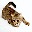

In [69]:
import cv2
from google.colab.patches import cv2_imshow

# Добавляем интерфейс для загрузки изображений напрямую из блокнота
from google.colab import files
uploaded = files.upload() 

# загружаем входное изображение, меняем его размер на необходимый и выводим его
image = cv2.imread(list(uploaded.keys())[0])
output = image.copy()
image = cv2.resize(image, (32, 32))
cv2_imshow(image)
     


In [70]:
img_c = image.copy()

In [73]:
import tensorflow as tf

img_c = tf.expand_dims(image, axis=0)

img_c.shape
#preds = model.predict(img_c)

TensorShape([1, 32, 32, 3])

In [74]:
preds = model.predict(img_c)

ValueError: ignored

Задание 3

In [75]:
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split

data, _ = fetch_olivetti_faces(return_X_y=True)
train, test = train_test_split(data, test_size=0.2, random_state=4)

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


In [76]:
train.shape

(320, 4096)

In [77]:
train = train.reshape((train.shape[0], 64, 64))
test = test.reshape((test.shape[0], 64, 64))

test.shape

(80, 64, 64)

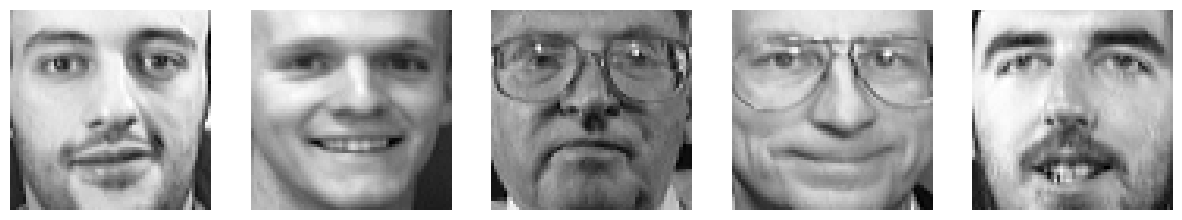

In [78]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots(1, 5, figsize=(15, 10))

for i in range(5):
    ax[i].imshow(train[i], cmap='gray')
    ax[i].axis('off')

In [80]:
n_pixels = train.shape[1]


X_train = train[:, :(n_pixels + 1) // 2, :]
y_train = train[:, n_pixels // 2:, :]


X_test = test[:, :(n_pixels + 1) // 2, :]
y_test = test[:, n_pixels // 2:, :]
     

In [81]:
y_train.shape

(320, 32, 64)

In [82]:
y_test.shape

(80, 32, 64)

In [83]:
X_train.shape

(320, 32, 64)

In [84]:
X_test.shape

(80, 32, 64)

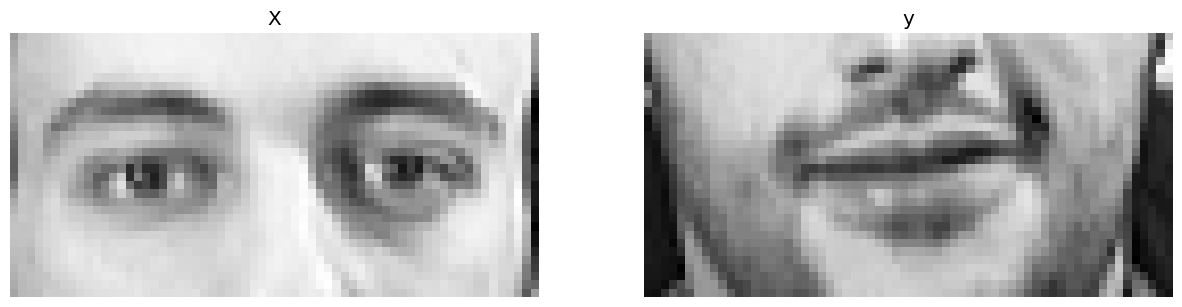

In [85]:
import matplotlib.pyplot as plt

idx = 0

fig, ax = plt.subplots(1, 2, figsize=(15, 8))
ax[0].imshow(X_train[idx], cmap='gray')
ax[0].set_title('X')
ax[1].imshow(y_train[idx], cmap='gray')
ax[1].set_title('y')
ax[0].axis('off')
ax[1].axis('off')

plt.show()

In [86]:
y_train_n = y_train.reshape(y_train.shape[0], 32 * 64)
y_test_n = y_test.reshape(y_test.shape[0], 32 * 64)

y_test_n.shape

(80, 2048)

In [87]:
y_train_n[0]

array([0.58264464, 0.677686  , 0.6859504 , ..., 0.45454547, 0.23966943,
       0.1983471 ], dtype=float32)

In [88]:
y_train_n.shape


(320, 2048)

In [89]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import random
import pickle
import cv2
from google.colab.patches import cv2_imshow
import os
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import math
import numpy as np
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten,  AveragePooling2D
 
from keras.optimizers import Adam, SGD
import matplotlib.pyplot as plt
import numpy as np
import keras

In [90]:
from keras.layers import Dense, Flatten
from keras.models import Sequential


model = Sequential([
    Flatten(input_shape=(32, 64)),
    Dense(1024, activation='relu'),
    Dense(1024, activation='relu'),
    Dense(32 * 64, activation='linear')
])

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 2048)              0         
                                                                 
 dense_21 (Dense)            (None, 1024)              2098176   
                                                                 
 dense_22 (Dense)            (None, 1024)              1049600   
                                                                 
 dense_23 (Dense)            (None, 2048)              2099200   
                                                                 
Total params: 5,246,976
Trainable params: 5,246,976
Non-trainable params: 0
_________________________________________________________________


In [91]:
y_train_n

array([[0.58264464, 0.677686  , 0.6859504 , ..., 0.45454547, 0.23966943,
        0.1983471 ],
       [0.56198347, 0.57438016, 0.58264464, ..., 0.21487603, 0.2107438 ,
        0.2231405 ],
       [0.607438  , 0.55785125, 0.54545456, ..., 0.30165288, 0.44214877,
        0.49586776],
       ...,
       [0.37603307, 0.38842976, 0.35123968, ..., 0.58677685, 0.59090906,
        0.60330576],
       [0.6404959 , 0.5247934 , 0.6280992 , ..., 0.2768595 , 0.2892562 ,
        0.2603306 ],
       [0.6322314 , 0.5371901 , 0.5206612 , ..., 0.46694216, 0.46280992,
        0.45454547]], dtype=float32)

In [92]:
model.compile(optimizer='adam', loss='mse', metrics='mae')

In [93]:
y_train_n

array([[0.58264464, 0.677686  , 0.6859504 , ..., 0.45454547, 0.23966943,
        0.1983471 ],
       [0.56198347, 0.57438016, 0.58264464, ..., 0.21487603, 0.2107438 ,
        0.2231405 ],
       [0.607438  , 0.55785125, 0.54545456, ..., 0.30165288, 0.44214877,
        0.49586776],
       ...,
       [0.37603307, 0.38842976, 0.35123968, ..., 0.58677685, 0.59090906,
        0.60330576],
       [0.6404959 , 0.5247934 , 0.6280992 , ..., 0.2768595 , 0.2892562 ,
        0.2603306 ],
       [0.6322314 , 0.5371901 , 0.5206612 , ..., 0.46694216, 0.46280992,
        0.45454547]], dtype=float32)

In [94]:
model.fit(X_train, y_train_n, epochs=300)

Epoch 1/300
10/10 [==============================] - 5s 186ms/step - loss: 0.1002 - mae: 0.2297
Epoch 2/300
10/10 [==============================] - 2s 177ms/step - loss: 0.0233 - mae: 0.1209
Epoch 3/300
10/10 [==============================] - 2s 158ms/step - loss: 0.0193 - mae: 0.1097
Epoch 4/300
10/10 [==============================] - 2s 179ms/step - loss: 0.0179 - mae: 0.1052
Epoch 5/300
10/10 [==============================] - 1s 99ms/step - loss: 0.0181 - mae: 0.1061
Epoch 6/300
10/10 [==============================] - 1s 102ms/step - loss: 0.0165 - mae: 0.1009
Epoch 7/300
10/10 [==============================] - 1s 112ms/step - loss: 0.0156 - mae: 0.0966
Epoch 8/300
10/10 [==============================] - 2s 152ms/step - loss: 0.0159 - mae: 0.0987
Epoch 9/300
10/10 [==============================] - 2s 162ms/step - loss: 0.0151 - mae: 0.0955
Epoch 10/300
10/10 [==============================] - 1s 142ms/step - loss: 0.0145 - mae: 0.0935
Epoch 11/300
10/10 [====================

In [95]:
preds = model.predict(X_test)

3/3 [==============================] - 0s 15ms/step


In [96]:
X_test[1]

array([[0.3305785 , 0.30578512, 0.3305785 , ..., 0.3966942 , 0.37190083,
        0.28512397],
       [0.32231405, 0.32231405, 0.29752067, ..., 0.41322315, 0.338843  ,
        0.2603306 ],
       [0.3264463 , 0.30991736, 0.30578512, ..., 0.40495867, 0.36363637,
        0.27272728],
       ...,
       [0.59090906, 0.61157024, 0.6404959 , ..., 0.6363636 , 0.61157024,
        0.57438016],
       [0.59090906, 0.61157024, 0.6487603 , ..., 0.6404959 , 0.607438  ,
        0.5785124 ],
       [0.58677685, 0.60330576, 0.661157  , ..., 0.6363636 , 0.59917355,
        0.57438016]], dtype=float32)

In [97]:
preds.shape

(80, 2048)

In [98]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(preds, y_test_n)

0.07295847

In [99]:
pred_test = preds.reshape(preds.shape[0], 32, 64)
pred_test.shape

(80, 32, 64)

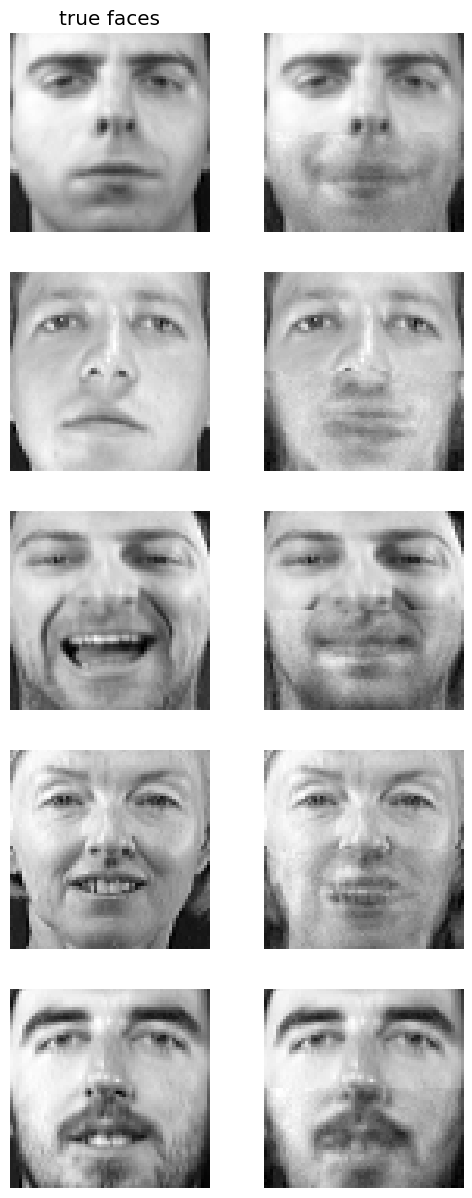

In [100]:
n_faces = 5
n_cols = 2
image_shape = (64, 64)
plt.figure(figsize=(3 * n_cols, 3 * n_faces))


for i in range(5):
    true_face = np.vstack((X_test[i], y_test[i]))

    if i:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 1)
    else:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 1, title="true faces")

    sub.axis("off")
    sub.imshow(
        true_face.reshape(image_shape), cmap=plt.cm.gray, interpolation="nearest"
    )

    completed_face = np.vstack((X_test[i], pred_test[i]))

    if i:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 2)

    else:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 2)

    sub.axis("off")
    sub.imshow(
        completed_face.reshape(image_shape),
        cmap=plt.cm.gray,
        interpolation="nearest",
    )